In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Upload Dataset**

In [30]:
df=pd.read_csv('winequality-red.csv')

In [31]:
df.shape

(1599, 12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
# Checking missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [34]:
# statistical measure
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


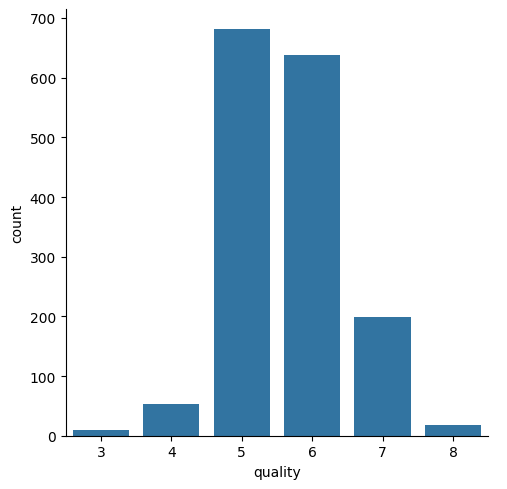

In [35]:
# number of values for each quality
sns.catplot(x='quality',data=df,kind='count')

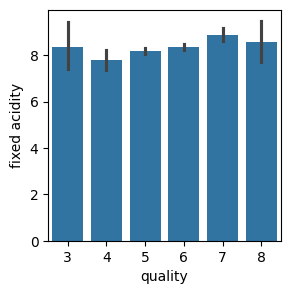

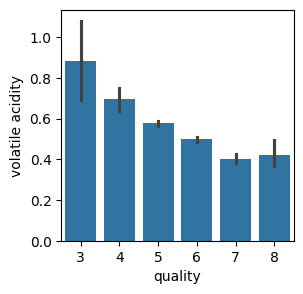

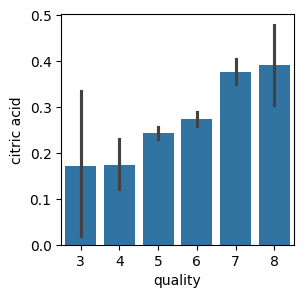

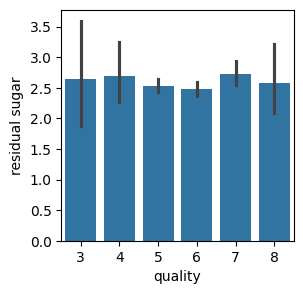

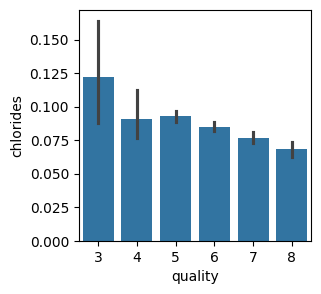

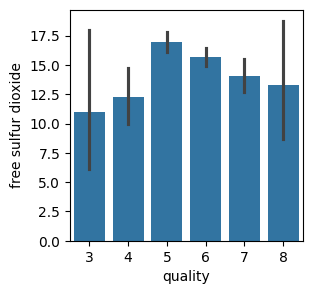

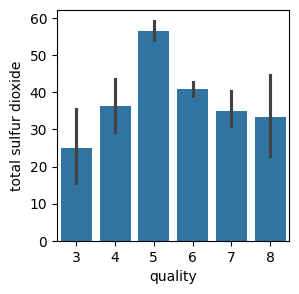

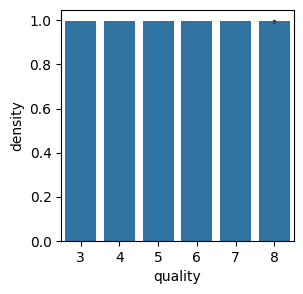

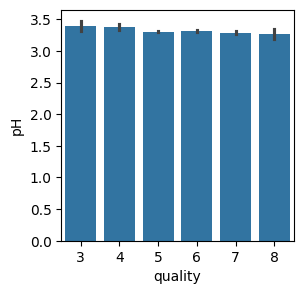

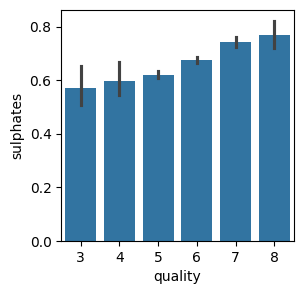

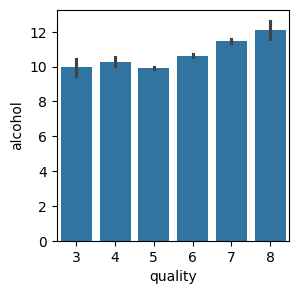

In [36]:
# how all the feature related to quality
features = [col for col in df.columns if col!='quality']
for col in features :
    plot=plt.figure(figsize=(3,3))
    sns.barplot(x='quality',y=col,data=df)

<Axes: >

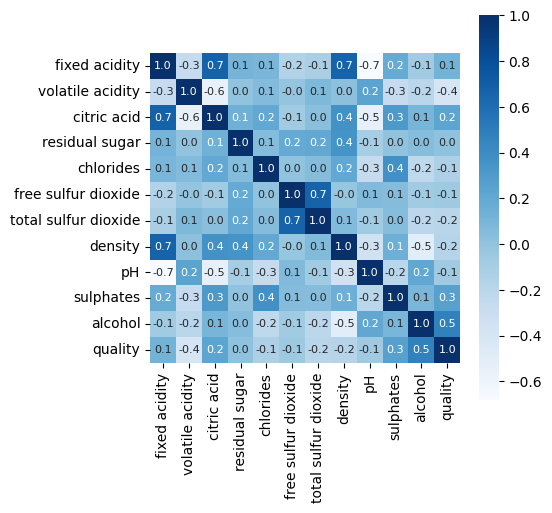

In [37]:
## Corrrelation
correlation = df.corr()
# constructing the heatmap to understand the corelation between the column
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True ,square=True, annot_kws={'size':8},cmap='Blues')

**Data Preprocessing**

In [38]:
X = df.drop('quality',axis=1)
y=df.quality.apply(lambda y_val: 1 if y_val>=7 else 0)

**Train Test Split**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

**Data Balancing**

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [41]:
y_train_balanced.value_counts()

,count
quality,
1,1099
0,1099


**Model Building**

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier()

In [44]:
model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

**Model Evaluation**

In [47]:
## accuracy score
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)


0.909375

**Building Predictive System**

In [54]:
input_data = (10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)
prediction = model.predict(input_data)
print(prediction)
if (prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')


[1]
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [56]:
input_data = (11.4,0.26,0.44,3.6,0.071,6.0,19.0,0.9986,3.12,0.82,9.3)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)
prediction = model.predict(input_data)
print(prediction)
if (prediction[0]==1):
    print('Good Quality Wine')
else:
        print('Bad Quality Wine')


[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
